# **Primetrade.ai Data Science Assignment**

## Trader Behavior and Market Sentiment *Analysis*

**Author:** Mohd Rushan\
**Email:** mohdrushan3101@gmail.com\
**Date:** October 23, 2025

### **Objective**

Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence
smarter trading strategies.


### **Importing Necessary Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Data Loading and Preprocessing**

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Define file paths (update with your actual Drive paths)
trader_data_path = '/content/drive/MyDrive/Colab Notebooks/PrimeTradeAI assignment/historical_data.csv'
sentiment_data_path = '/content/drive/MyDrive/Colab Notebooks/PrimeTradeAI assignment/fear_greed_index.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Sentiment Data**

In [ ]:
#Load dataset into DataFrame
sentiment_df = pd.read_csv(sentiment_data_path)

# Display basic info
print("\nSentiment Data:")
display(sentiment_df.head())


Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Understand Basic Structure of Data

In [ ]:
# Shape and column info
print("Sentiment Data Shape:", sentiment_df.shape)

print("\n--- Sentiment Data Info ---")
sentiment_df.info()

# Check missing values
print("\nMissing values in Sentiment Data:")
print(sentiment_df.isnull().sum())

# Check duplicate rows
print("\nDuplicate rows in Sentiment Data:", sentiment_df.duplicated().sum())

Sentiment Data Shape: (2644, 4)

--- Sentiment Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate rows in Sentiment Data: 0


**Shape:** The DataFrame has 2644 rows and 4 columns.

**Info:** The sentiment data has 4 columns with names
*   **timestamp:** This column contains integer values representing the timestamp of the data point.
*   **value:** This column contains integer values representing the fear and greed index value.
*   **classification:** This column contains object (string) values classifying the market sentiment (e.g., Fear, Extreme Fear, Neutral, Greed, Extreme Greed).
*   **date:** This column contains object (string) values representing the date of the data point. It should be converted to a datetime format for time-based analysis.

**Missing values:** Explicitly confirms that there are no null/missing values in the DataFrame.

**Duplicate rows:** Shows that there are no duplicate rows in the DataFrame.

Data Preprocessing

In [ ]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


#### **Trader Data**

In [ ]:
# Load datasets into DataFrames
trader_df = pd.read_csv(trader_data_path)

# Display basic info
print("Trader Data:")
display(trader_df.head())

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Understand Basic Structure of Data

In [ ]:
# Shape and column info
print("Trader Data Shape:", trader_df.shape)

print("\n--- Trader Data Info ---")
trader_df.info()

# Check missing values
print("\nMissing values in trader Data:")
print(trader_df.isnull().sum())

# Check duplicate rows
print("\nDuplicate rows in trader Data:", trader_df.duplicated().sum())

Trader Data Shape: (211224, 16)

--- Trader Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp 

Here are the key insights from the Trader Data:

**Shape:** The DataFrame has 211,224 rows and 16 columns, indicating a substantial dataset of trading activities.

**Info:** The trader data contains 16 columns with name
*   **Account:** A unique identifier for the trader's account.
*   **Coin:** The cryptocurrency or asset being traded.
*   **Execution Price:** The price at which the trade was executed.
*   **Size Tokens:** The quantity of tokens traded.
*   **Size USD:** The value of the trade in USD.
*   **Side:** Indicates whether the trade was a BUY or SELL.
*   **Timestamp IST:** The timestamp of the trade in IST (Indian Standard Time). This should be converted to a `datetime` object.
*   **Start Position:** The trader's position size before the trade.
*   **Direction:** The direction of the trade (e.g., Buy or Sell).
*   **Closed PnL:** The realized profit or loss from the trade.
*   **Transaction Hash:** A unique identifier for the blockchain transaction.
*   **Order ID:** A unique identifier for the trading order. This should be converted to an `object` data type instead of `int64`.
*   **Crossed:** A boolean indicating if the order crossed the spread.
*   **Fee:** The fee incurred for the trade in USD.
*   **Trade ID:** A unique identifier for the trade. This should be converted to an `object` data type instead of `float64`.
*   **Timestamp:** Another timestamp column, likely in a different format or timezone than `Timestamp IST`.

**Missing values:** Explicitly confirms that there are no null/missing values across all columns, which simplifies the data cleaning process.

**Duplicate rows:** Shows that there are no duplicate rows in the DataFrame, suggesting the data is unique and consistent at the row level.

Data Preprocessing

In [ ]:
trader_df["Order ID"] = trader_df["Order ID"].astype('object')
trader_df["Trade ID"] = trader_df["Trade ID"].astype('object')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Convert trader timestamps to date only (for easier merging later)
trader_df['date'] = trader_df['Timestamp IST'].dt.date  #returns object datatype

# Convert back to datetime (so Pandas treats it consistently)
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [ ]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  object        
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### **Exploratory Data Analysis ( Sentiment Data )**

In [ ]:
# Display first few rows
display(sentiment_df.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Summary statistics for numeric columns
sentiment_df.describe()

,timestamp,value,date
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.000000,2018-02-01 00:00:00
25%,1.574811e+09,28.000000,2019-11-26 18:00:00
50%,1.631900e+09,46.000000,2021-09-17 12:00:00
75%,1.688989e+09,66.000000,2023-07-10 06:00:00
max,1.746164e+09,95.000000,2025-05-02 00:00:00
std,6.597967e+07,21.827680,NaN


In [ ]:
# Summary statistics for categorical columns
sentiment_df.describe(include=['object'])

,classification
count,2644
unique,5
top,Fear
freq,781


In [ ]:
# Count how many times each sentiment appears
print("\nSentiment Class Distribution:")
display(pd.DataFrame([sentiment_df['classification'].value_counts(),sentiment_df['classification'].value_counts(normalize=True)*100]).T)

# Check for date range coverage
print("\nDate Range:")
print("Start Date:", sentiment_df['date'].min())
print("End Date:", sentiment_df['date'].max())


Sentiment Class Distribution:


,count,proportion
classification,,
Fear,781.0,29.538578
Greed,633.0,23.940998
Extreme Fear,508.0,19.213313
Neutral,396.0,14.977307
Extreme Greed,326.0,12.329803



Date Range:
Start Date: 2018-02-01 00:00:00
End Date: 2025-05-02 00:00:00


*   The dataset contains daily Fear & Greed Index values and their corresponding classifications.
*   The `value` column, representing the index, ranges from 5 to 95, aligning with the index's scale of 0 (Extreme Fear) to 100 (Extreme Greed).
*   The `classification` column shows the distribution of sentiment categories. "Fear" and "Greed" are the most frequent classifications, followed by "Extreme Fear", "Neutral", and "Extreme Greed". This gives an idea of the general market sentiment over the observed period.
*   The date range of the sentiment data is from `2018-02-01` to `2025-05-02`, providing a substantial historical context for analysis.

Countplot for sentiment classes

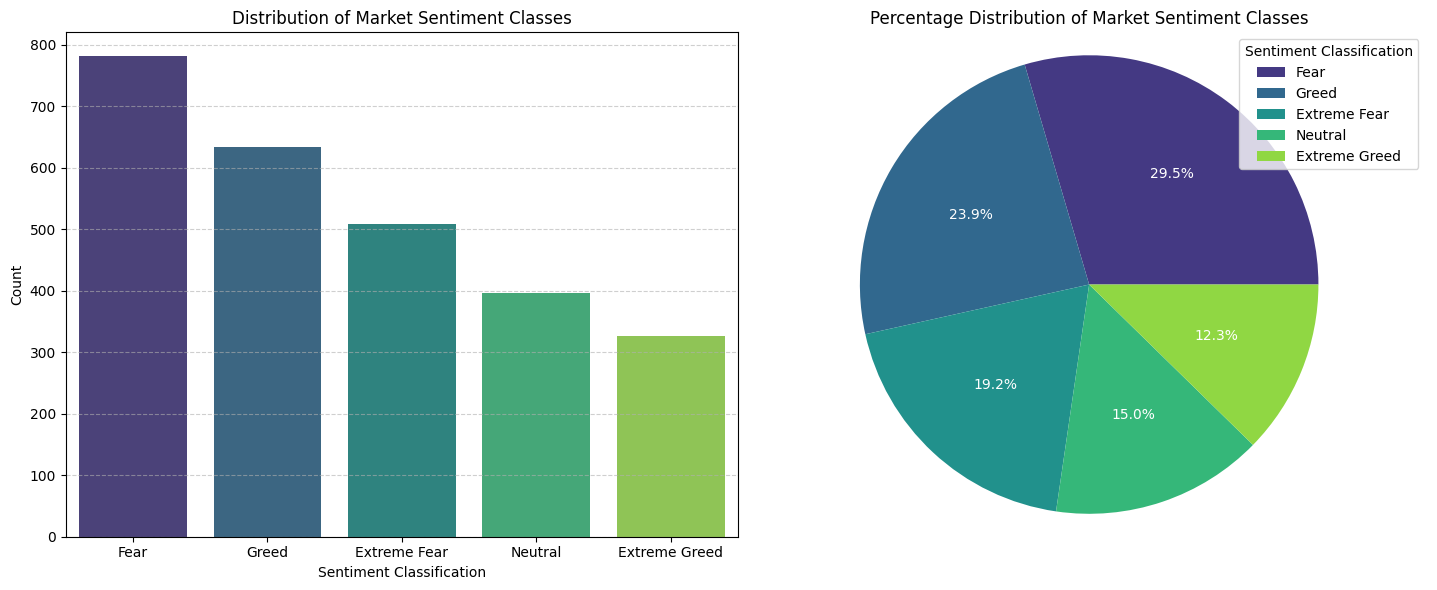

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot for sentiment classes
sns.countplot(ax=axes[0], data=sentiment_df, x='classification', order=sentiment_df['classification'].value_counts().index, palette='viridis')
axes[0].set_title('Distribution of Market Sentiment Classes')
axes[0].set_xlabel('Sentiment Classification')
axes[0].set_ylabel('Count')
axes[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# Pie chart for sentiment classes percentage
sentiment_counts = sentiment_df['classification'].value_counts()
axes[1].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_counts)), textprops={'color': 'white'})
axes[1].set_title('Percentage Distribution of Market Sentiment Classes')
axes[1].legend(title='Sentiment Classification', loc='upper right')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

* Each bar shows how many days the market was in Fear, Greed, Extreme Fear,Neutral or Extreme Greed.

* This also helps later when we compare trader behavior under each sentiment class.

Trend of Fear & Greed Index Over Time

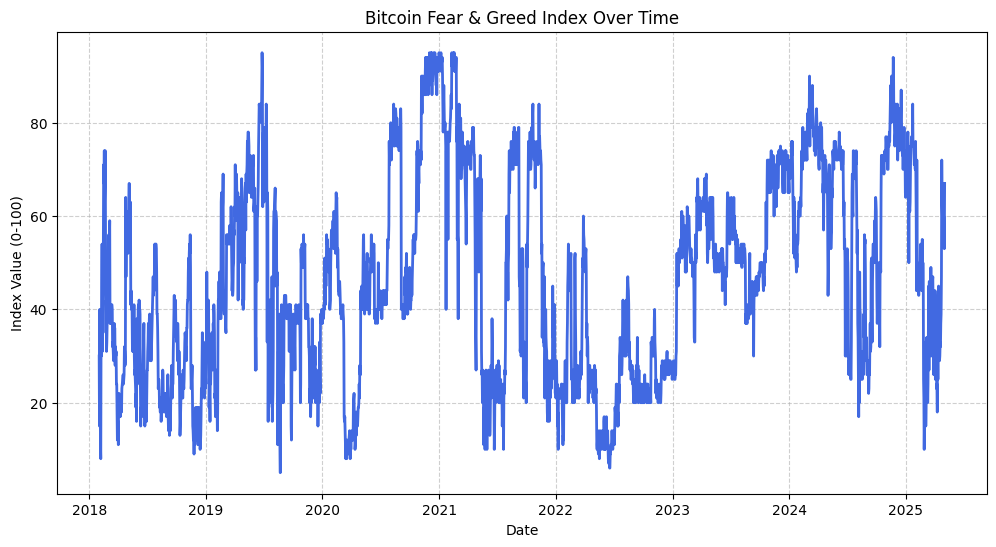

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sentiment_df['date'], sentiment_df['value'], color='royalblue', linewidth=2)
plt.title('Bitcoin Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value (0-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

* The y-axis shows the Fear & Greed Index value (0–100).

* The x-axis shows time.

* When the line is low (0–25) → Extreme Fear

* When the line is high (75–100) → Extreme Greed

Overlay Sentiment Classes on the Line Chart

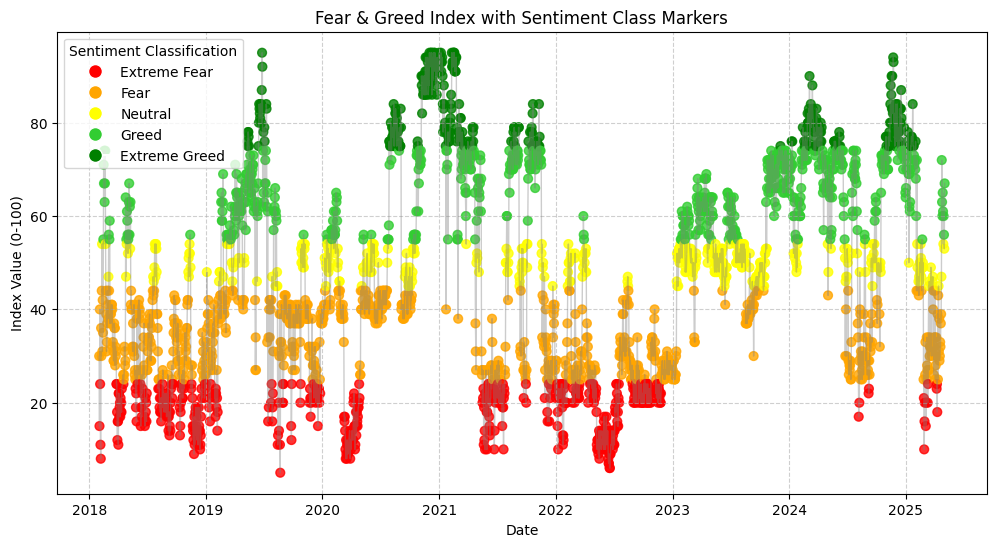

In [ ]:
# Assign colors to classes
colors = {
    'Extreme Fear': 'red',
    'Fear': 'orange',
    'Neutral': 'yellow',
    'Greed': 'limegreen',
    'Extreme Greed': 'green'
}

plt.figure(figsize=(12,6))

# Create scatter plot with color mapping
scatter = plt.scatter(sentiment_df['date'], sentiment_df['value'],
            c=sentiment_df['classification'].map(colors), s=40, alpha=0.8)
plt.plot(sentiment_df['date'], sentiment_df['value'], color='gray', alpha=0.4, linewidth=1)

plt.title('Fear & Greed Index with Sentiment Class Markers')
plt.xlabel('Date')
plt.ylabel('Index Value (0-100)')
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=label) for label in colors]
plt.legend(handles=handles, title='Sentiment Classification')

plt.show()

* Each dot represents a day’s sentiment value.

* Color = Sentiment Class (red for Extreme Fear, green for Greed, etc.).

* You can visually identify periods of prolonged Fear or waves of Greed.

* This will help later when correlating trader performance with these phases.

### **Exploratory Data Analysis ( Trader Data )**

In [ ]:
# Display first few rows
display(trader_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000.0,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000.0,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000.0,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000.0,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000.0,1.730000e+12,2024-12-02


In [ ]:
# Summary statistics for numerical columns
trader_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Execution Price,211224.0,11414.72335,0.000005,4.8547,18.28,101.58,109004.0,29447.654868
Size Tokens,211224.0,4623.364979,0.000001,2.94,32.0,187.9025,15822438.0,104272.88953
Size USD,211224.0,5639.45121,0.0,193.79,597.045,2058.96,3921430.72,36575.138546
Timestamp IST,211224,2025-01-31 12:04:22.915009792,2023-05-01 01:06:00,2024-12-31 21:00:45,2025-02-24 18:55:00,2025-04-02 18:22:00,2025-05-01 12:13:00,NaN
Start Position,211224.0,-29946.248839,-14334629.0,-376.231075,84.727932,9337.2775,30509482.0,673807.423736
Closed PnL,211224.0,48.749001,-117990.1041,0.0,0.0,5.792797,135329.0901,919.164828
Fee,211224.0,1.163967,-1.175712,0.016121,0.089578,0.393811,837.471593,6.758854
Timestamp,211224.0,1737744290421.542969,1680000000000.0,1740000000000.0,1740000000000.0,1740000000000.0,1750000000000.0,8689920301.590015
date,211224,2025-01-30 23:54:28.674013952,2023-05-01 00:00:00,2024-12-31 00:00:00,2025-02-24 00:00:00,2025-04-02 00:00:00,2025-05-01 00:00:00,NaN


In [ ]:
# Summary statistics for categorical columns
trader_df.describe(include=['object','bool']).T

,count,unique,top,freq
Account,211224,32,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184
Coin,211224,246,HYPE,68005
Side,211224,2,SELL,108528
Direction,211224,12,Open Long,49895
Transaction Hash,211224,101184,0x00000000000000000000000000000000000000000000...,9032
Order ID,211224,50555,61636246980,390
Crossed,211224,2,True,128403
Trade ID,211224.0,2810.0,1120000000000000.0,1946.0


In [ ]:
# Unique traders and coins traded
print("\nNumber of Unique Traders:", trader_df['Account'].nunique())
print("Number of Unique Coins Traded:", trader_df['Coin'].nunique())
print("\nCoins Traded:")
print(trader_df['Coin'].value_counts().head(10))


Number of Unique Traders: 32
Number of Unique Coins Traded: 246

Coins Traded:
Coin
HYPE         68005
@107         29992
BTC          26064
ETH          11158
SOL          10691
FARTCOIN      4650
MELANIA       4428
PURR/USDC     2774
WLD           1983
SUI           1979
Name: count, dtype: int64


In [ ]:
# Count how many times each 'Side' appears
print("\nTrader Side Distribution:")
display(pd.DataFrame([trader_df['Side'].value_counts(),trader_df['Side'].value_counts(normalize=True)*100]).T)

# Count how many times each 'Direction' appears
print("\nTrader Direction Distribution:")
display(pd.DataFrame([trader_df['Direction'].value_counts(),trader_df['Direction'].value_counts(normalize=True)*100]).T)

# Count how many times each 'Crossed' value appears
print("\nTrader Crossed Distribution:")
display(pd.DataFrame([trader_df['Crossed'].value_counts(),trader_df['Crossed'].value_counts(normalize=True)*100]).T)


Trader Side Distribution:


,count,proportion
Side,,
SELL,108528.0,51.380525
BUY,102696.0,48.619475



Trader Direction Distribution:


,count,proportion
Direction,,
Open Long,49895.0,23.621842
Close Long,48678.0,23.045677
Open Short,39741.0,18.814623
Close Short,36013.0,17.049672
Sell,19902.0,9.422225
Buy,16716.0,7.913873
Spot Dust Conversion,142.0,0.067227
Short > Long,70.0,0.033140
Long > Short,57.0,0.026986



Trader Crossed Distribution:


,count,proportion
Crossed,,
True,128403.0,60.789967
False,82821.0,39.210033


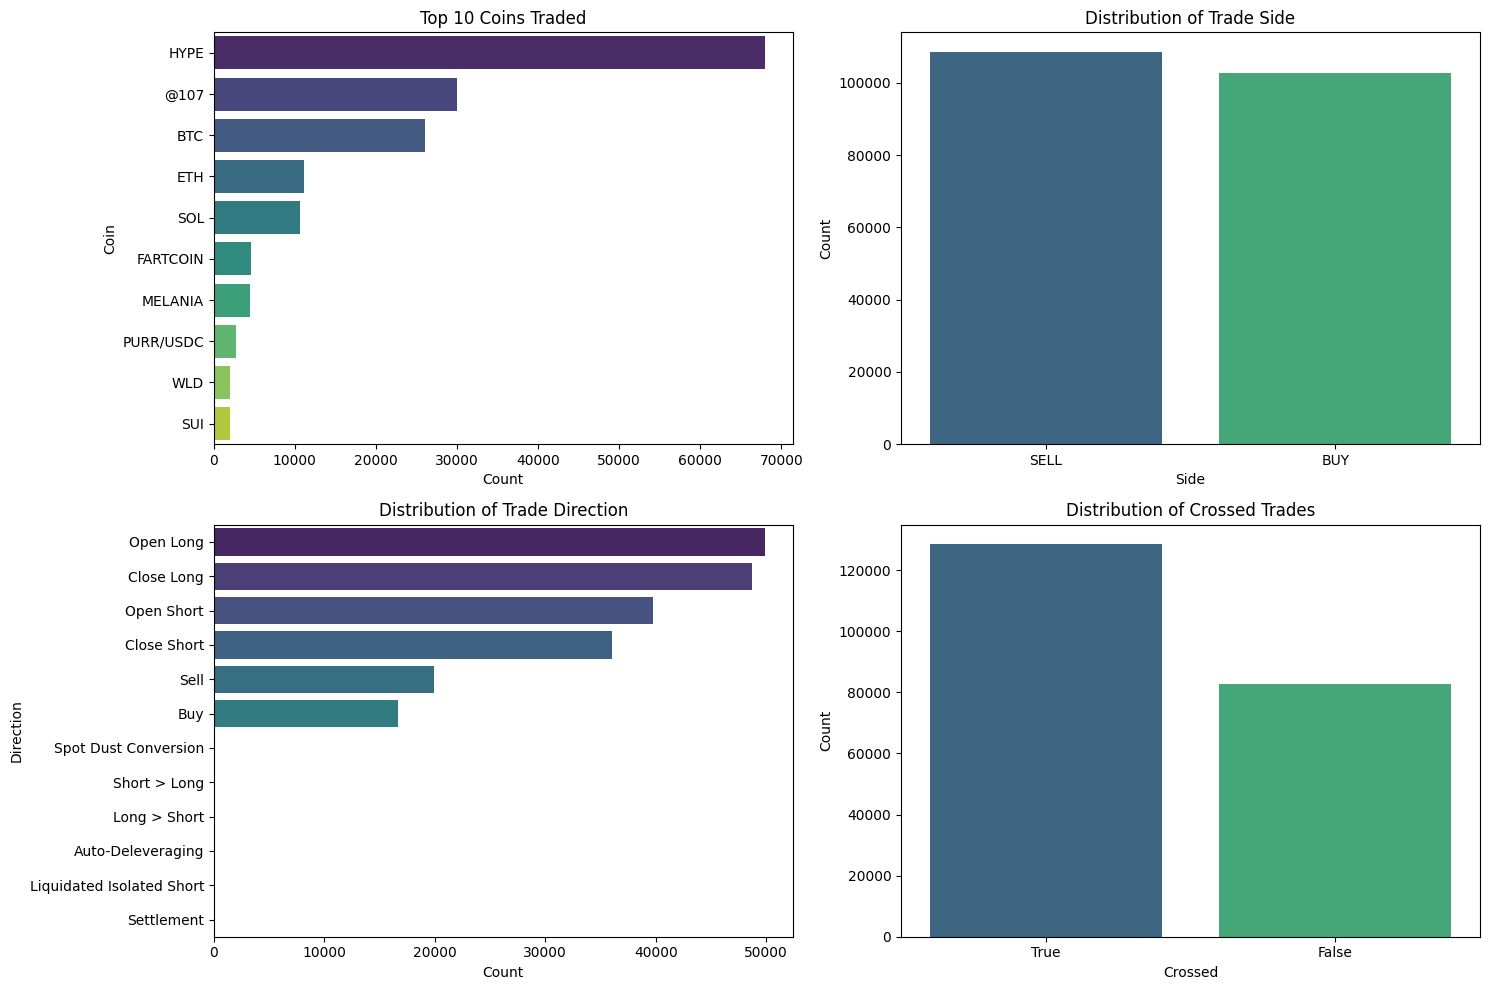

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Countplot for top 10 coins
sns.countplot(ax=axes[0, 0], y='Coin', data=trader_df, order=trader_df['Coin'].value_counts().nlargest(10).index, palette='viridis')
axes[0, 0].set_title('Top 10 Coins Traded')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Coin')

# Countplot for Side
sns.countplot(ax=axes[0, 1], x='Side', data=trader_df, order=trader_df['Side'].value_counts().index, palette='viridis')
axes[0, 1].set_title('Distribution of Trade Side')
axes[0, 1].set_xlabel('Side')
axes[0, 1].set_ylabel('Count')

# Countplot for Direction
sns.countplot(ax=axes[1, 0], y='Direction', data=trader_df, order=trader_df['Direction'].value_counts().index, palette='viridis')
axes[1, 0].set_title('Distribution of Trade Direction')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Direction')

# Countplot for Crossed
sns.countplot(ax=axes[1, 1], x='Crossed', data=trader_df, order=trader_df['Crossed'].value_counts().index, palette='viridis')
axes[1, 1].set_title('Distribution of Crossed Trades')
axes[1, 1].set_xlabel('Crossed')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

*   The dataset is quite large, with over 211,000 trading activities recorded.
*   There are 32 unique traders and a wide variety of 246 unique coins being traded, with 'HYPE', '@107', 'BTC', 'ETH', and 'SOL' being the most frequently traded coins.
*   The trades are almost evenly split between BUY (48.62%) and SELL (51.38%) sides.
*   Looking at the `Direction` column, the most common activities are opening and closing Long and Short positions, along with direct Buy and Sell orders.
*   A significant portion of trades (`Crossed` is True for 60.79%) likely involved crossing the spread, which could imply market order executions or trades that immediately matched with existing limit orders.
*   The summary statistics for numerical columns show a wide range of values for `Execution Price`, `Size Tokens`, `Size USD`, `Start Position`, `Closed PnL`, and `Fee`, indicating diverse trading activities and outcomes. The `Closed PnL` has a mean of around 48.75, but the large standard deviation and minimum/maximum values suggest a high variability in profitability among trades.

### **Sentiment wise Analysis**

**Merge on Date**

Now, we merge both datasets so that each trade is tagged with the corresponding market sentiment score of that day.

In [ ]:
# Merge sentiment and trader data on date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

print("Merged Data Shape:", merged_df.shape)
display(merged_df.head())

Merged Data Shape: (211218, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000.0,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000.0,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,660000000000000.0,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1080000000000000.0,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1050000000000000.0,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


**Creating New Metrics**

In [ ]:
#Net PnL
merged_df['Net_PnL'] = merged_df['Closed PnL'] - merged_df['Fee']

#Net PnL %
merged_df['NetPnL%'] = merged_df['Net_PnL'] / merged_df['Size USD']*100
merged_df['NetPnL%'].replace([np.inf, -np.inf],0, inplace=True)

#Win and Loss
merged_df['Win'] = (merged_df['Net_PnL'] > 0).astype(int)
merged_df['Loss'] = (merged_df['Net_PnL'] <= 0).astype(int)


#### **Grouping by Sentiment Classification**

In [40]:
# Group by market sentiment
sentiment_summary = (
    merged_df.groupby('classification')
    .agg(
        total_trades = ('Net_PnL', 'count'),
        total_wins   = ('Win', 'sum'),
        total_losses = ('Loss', 'sum'),
        total_pnl = ('Net_PnL','sum'),
        avg_net_pnl  = ('Net_PnL', 'mean'),
        avg_netpnl_pct = ('NetPnL%', 'mean')
    )
    .reset_index()
)

# Calculate win rate
sentiment_summary['win_rate_%'] = (sentiment_summary['total_wins'] /

                                   sentiment_summary['total_trades']) * 100


display(sentiment_summary)


,classification,total_trades,total_wins,total_losses,total_pnl,avg_net_pnl,avg_netpnl_pct,win_rate_%
0,Extreme Fear,21400,7885,13515,7.152216e+05,33.421571,0.410803,36.845794
1,Extreme Greed,39992,18704,21288,2.688141e+06,67.216960,3.977347,46.769354
2,Fear,61837,25447,36390,3.264698e+06,52.795228,1.492500,41.151738
3,Greed,50303,19681,30622,2.087031e+06,41.489187,1.939793,39.124903
4,Neutral,37686,14920,22766,1.253546e+06,33.262920,0.951116,39.590299


In [41]:
# Save the sentiment_summary DataFrame to Google Drive
output_path = '/content/drive/MyDrive/Colab Notebooks/PrimeTradeAI assignment/sentiment_summary.csv'
sentiment_summary.to_csv(output_path, index=False)

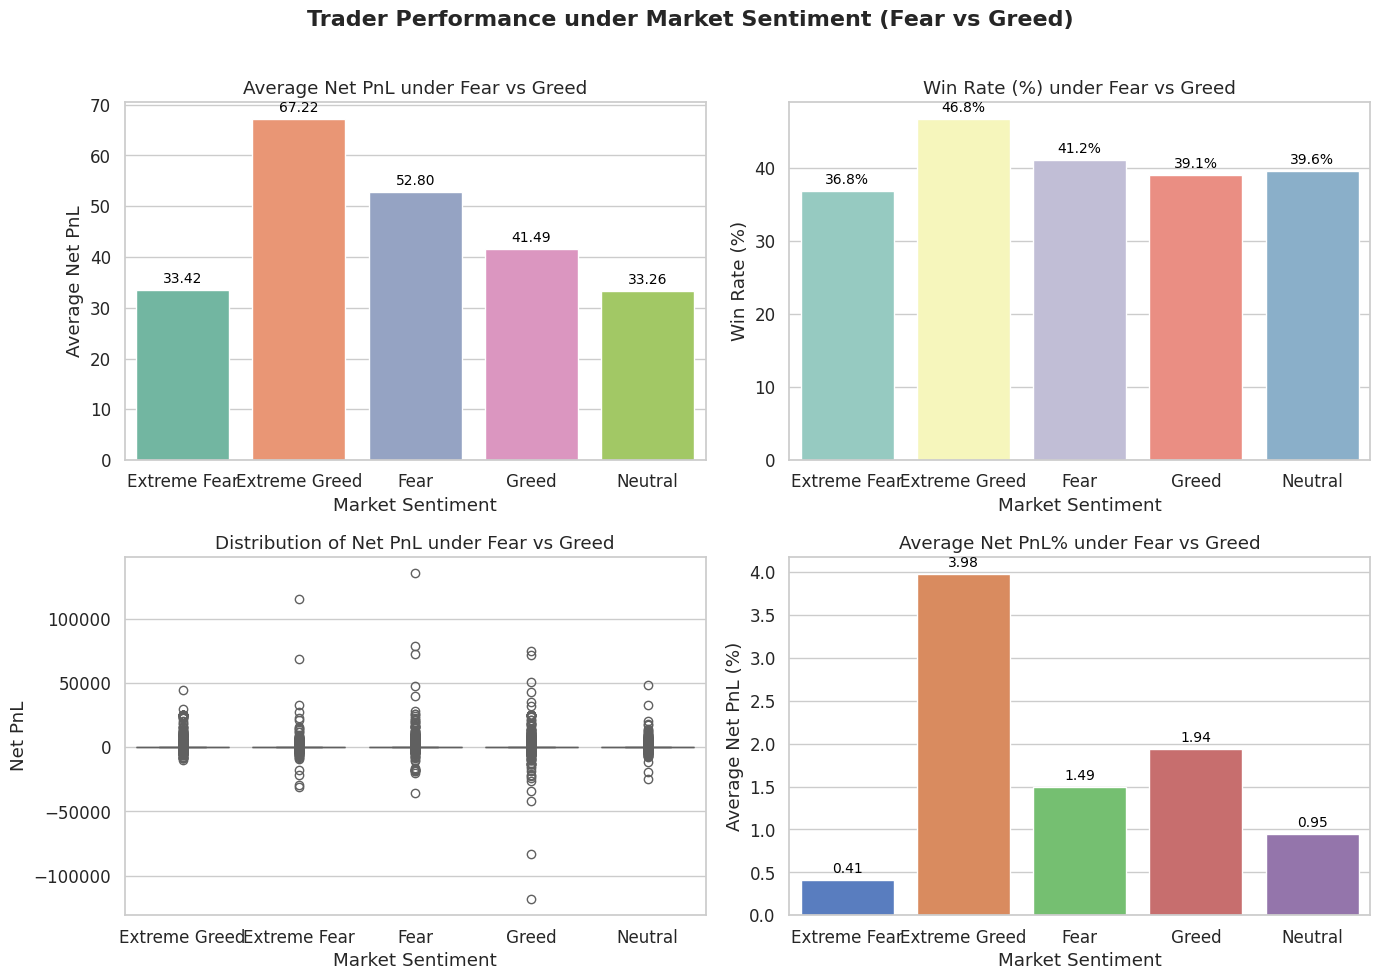

In [51]:

# Set figure style
sns.set(style="whitegrid", font_scale=1.1)

# Create the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Trader Performance under Market Sentiment (Fear vs Greed)", fontsize=16, fontweight='bold')

# -------------------------
# (1) Average Net PnL (Barplot)
sns.barplot(
    data=sentiment_summary,
    x='classification',
    y='avg_net_pnl',
    ax=axes[0, 0],
    palette='Set2'
)
axes[0, 0].set_title('Average Net PnL under Fear vs Greed')
axes[0, 0].set_xlabel('Market Sentiment')
axes[0, 0].set_ylabel('Average Net PnL')

# Add value labels
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# -------------------------
# (2) Win Rate (Barplot)
sns.barplot(
    data=sentiment_summary,
    x='classification',
    y='win_rate_%',
    ax=axes[0, 1],
    palette='Set3'
)
axes[0, 1].set_title('Win Rate (%) under Fear vs Greed')
axes[0, 1].set_xlabel('Market Sentiment')
axes[0, 1].set_ylabel('Win Rate (%)')

# Add value labels
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.1f}%',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# -------------------------
# (3) Net PnL Distribution (Boxplot)
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Net_PnL',
    ax=axes[1, 0],
    palette='coolwarm'
)
axes[1, 0].set_title('Distribution of Net PnL under Fear vs Greed')
axes[1, 0].set_xlabel('Market Sentiment')
axes[1, 0].set_ylabel('Net PnL')

# -------------------------
# (4) Average Net PnL% (Barplot)
sns.barplot(
    data=sentiment_summary,
    x='classification',
    y='avg_netpnl_pct',
    ax=axes[1, 1],
    palette='muted'
)
axes[1, 1].set_title('Average Net PnL% under Fear vs Greed')
axes[1, 1].set_xlabel('Market Sentiment')
axes[1, 1].set_ylabel('Average Net PnL (%)')

# Add value labels
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

# -------------------------
# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Insights from Sentiment-wise Analysis**

Here are the key insights from the tables and graphs after grouping by sentiment classification:

**Sentiment Summary Table:**

*   **Total Trades:** The majority of trades occurred during "Fear" and "Greed" sentiment periods, followed by "Extreme Greed," "Neutral," and "Extreme Fear." This suggests that traders are most active when the market sentiment is less extreme.
*   **Total PnL:** While "Fear" and "Greed" periods saw the highest total PnL, this is likely due to the higher volume of trades during these times.
*   **Average Net PnL and Average Net PnL %:** The highest average Net PnL and Average Net PnL% were observed during "Extreme Greed" periods, followed by "Fear", "Greed", "Extreme Fear", and "Neutral". This indicates that, on average, trades were more profitable during periods of extreme optimism.
*   **Win Rate:** The highest win rate is also seen during "Extreme Greed" sentiment, suggesting that trades executed during this period were more likely to be profitable. "Fear", "Neutral", "Greed", and "Extreme Fear" follow in terms of win rate.

**Trader Performance Plots:**

*   **Average Net PnL:** The bar plot clearly shows that the average Net PnL is highest during "Extreme Greed" and lowest during "Extreme Fear" and "Neutral" sentiment.
*   **Win Rate (%):** The win rate bar plot mirrors the average PnL, with "Extreme Greed" showing the highest win rate. This reinforces the observation that trading during extremely bullish periods tended to be more successful in terms of the number of winning trades.
*   **Distribution of Net PnL:** The boxplot shows the distribution of Net PnL for each sentiment class. While "Extreme Greed" has the highest median Net PnL and a larger interquartile range (indicating more variability but also potentially larger profits), all sentiment classes show a significant number of outliers with large positive and negative PnL, highlighting the inherent volatility in trading. The boxplot for "Extreme Fear" and "Neutral" is more centered around zero with a smaller spread, suggesting less volatile but also less profitable trading environments on average.
*   **Average Net PnL%:** Similar to the Average Net PnL plot, this plot shows that the average percentage return on trades is highest during "Extreme Greed".

**Overall Insights:**

The analysis suggests that, for this group of traders and this dataset, trading during periods of "Extreme Greed" (high fear & greed index values) was, on average, the most profitable in terms of both average Net PnL and win rate. This could imply that these traders were successfully capitalizing on bullish market momentum. Conversely, trading during periods of "Extreme Fear" and "Neutral" sentiment appeared to be less profitable on average.

It's important to note that while "Extreme Greed" shows the best average performance, the boxplot indicates that significant losses are still possible during these times, as they are in all market sentiments. This analysis highlights the importance of considering market sentiment, but individual risk management and strategy remain crucial.

This analysis provides a good starting point for understanding how market sentiment correlates with trader performance. Further analysis could involve looking at individual trader performance under different sentiments, analyzing specific coins traded during these periods, or incorporating other factors like trading volume and leverage.